In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

# Generate list of 500 random cities

In [2]:
# Create a set of random latitudes and longitude combinations.
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

610

# Use API to get weather data on list of cities.

In [4]:
# Adding API key to URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vengerovo
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | wajir
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | pangoa
Processing Record 17 of Set 1 | aksarka
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | yuci
Processing Record 23 of 

Processing Record 41 of Set 4 | yugorsk
Processing Record 42 of Set 4 | maindargi
Processing Record 43 of Set 4 | stradella
Processing Record 44 of Set 4 | honningsvag
Processing Record 45 of Set 4 | unguia
Processing Record 46 of Set 4 | kishi
Processing Record 47 of Set 4 | point pleasant
Processing Record 48 of Set 4 | kiunga
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | yenagoa
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | walvis bay
Processing Record 4 of Set 5 | anderson
Processing Record 5 of Set 5 | wollongong
Processing Record 6 of Set 5 | mitu
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | tsabong
Processing Record 9 of Set 5 | bemidji
Processing Record 10 of Set 5 | zhangye
Processing Record 11 of Set 5 | pine bluff
Processing Record 12 of Set 5 | rocha
Processing Record 13 of Set 5 | sayat
Processing Record 14 of Set 5 | walin

Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | andarab
City not found. Skipping...
Processing Record 33 of Set 8 | mersin
Processing Record 34 of Set 8 | fare
Processing Record 35 of Set 8 | ife
Processing Record 36 of Set 8 | hay river
Processing Record 37 of Set 8 | sao gabriel da cachoeira
Processing Record 38 of Set 8 | bunia
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | puerto colombia
Processing Record 41 of Set 8 | vao
Processing Record 42 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 43 of Set 8 | port hardy
Processing Record 44 of Set 8 | maniitsoq
Processing Record 45 of Set 8 | eyl
Processing Record 46 of Set 8 | mogzon
Processing Record 47 of Set 8 | nikolskoye
Processing Record 48 of Set 8 | manono
Processing Record 49 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 50 of Set 8 | charcas
Processing Record 1 of Set 9 | portland
Processing Record 2 of Set 9 | miracema do tocantins
Pro

Processing Record 15 of Set 12 | boromo
Processing Record 16 of Set 12 | pergamino
Processing Record 17 of Set 12 | kuusamo
Processing Record 18 of Set 12 | viedma
Processing Record 19 of Set 12 | tongchuan
Processing Record 20 of Set 12 | avera
Processing Record 21 of Set 12 | mizdah
Processing Record 22 of Set 12 | san isidro
Processing Record 23 of Set 12 | ongandjera
Processing Record 24 of Set 12 | aklavik
Processing Record 25 of Set 12 | alta floresta
Processing Record 26 of Set 12 | pilar
Processing Record 27 of Set 12 | kungurtug
Processing Record 28 of Set 12 | alzamay
Processing Record 29 of Set 12 | urambo
Processing Record 30 of Set 12 | the valley
Processing Record 31 of Set 12 | tiruchchendur
Processing Record 32 of Set 12 | assela
City not found. Skipping...
Processing Record 33 of Set 12 | pangai
Processing Record 34 of Set 12 | ferme-neuve
Processing Record 35 of Set 12 | srednekolymsk
Processing Record 36 of Set 12 | warwick
Processing Record 37 of Set 12 | samandag
P

In [6]:
# Convert the array of dictionaries into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vengerovo,55.6848,76.7471,53.13,95,99,14.63,RU,2022-07-01 17:52:54
1,Barrow,71.2906,-156.7887,46.42,76,0,9.22,US,2022-07-01 17:52:54
2,Port Alfred,-33.5906,26.8910,66.18,49,0,1.01,ZA,2022-07-01 17:52:55
3,Rikitea,-23.1203,-134.9692,71.98,72,52,16.71,PF,2022-07-01 17:52:55
4,Ilulissat,69.2167,-51.1000,43.81,64,96,2.77,GL,2022-07-01 17:52:55
5,Wajir,1.7471,40.0573,82.36,51,0,4.61,KE,2022-07-01 17:52:56
6,Cape Town,-33.9258,18.4232,68.88,54,0,17.27,ZA,2022-07-01 17:49:40
7,Tasiilaq,65.6145,-37.6368,38.66,85,51,7.70,GL,2022-07-01 17:52:56
8,Chokurdakh,70.6333,147.9167,43.09,74,100,12.77,RU,2022-07-01 17:52:56
9,Victoria,22.2855,114.1577,82.33,91,100,23.00,HK,2022-07-01 17:50:13


In [7]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vengerovo,RU,2022-07-01 17:52:54,55.6848,76.7471,53.13,95,99,14.63
1,Barrow,US,2022-07-01 17:52:54,71.2906,-156.7887,46.42,76,0,9.22
2,Port Alfred,ZA,2022-07-01 17:52:55,-33.5906,26.8910,66.18,49,0,1.01
3,Rikitea,PF,2022-07-01 17:52:55,-23.1203,-134.9692,71.98,72,52,16.71
4,Ilulissat,GL,2022-07-01 17:52:55,69.2167,-51.1000,43.81,64,96,2.77
5,Wajir,KE,2022-07-01 17:52:56,1.7471,40.0573,82.36,51,0,4.61
6,Cape Town,ZA,2022-07-01 17:49:40,-33.9258,18.4232,68.88,54,0,17.27
7,Tasiilaq,GL,2022-07-01 17:52:56,65.6145,-37.6368,38.66,85,51,7.70
8,Chokurdakh,RU,2022-07-01 17:52:56,70.6333,147.9167,43.09,74,100,12.77
9,Victoria,HK,2022-07-01 17:50:13,22.2855,114.1577,82.33,91,100,23.00


In [8]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df.Humidity
cloudiness = city_data_df.Cloudiness
wind_speed = city_data_df['Wind Speed']

# Create scatter plots

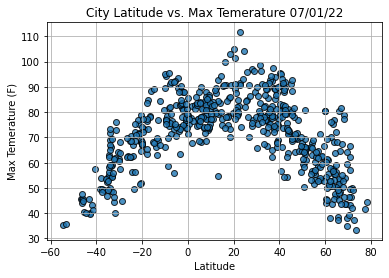

In [10]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temerature '+ time.strftime('%x'))
plt.ylabel('Max Temerature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

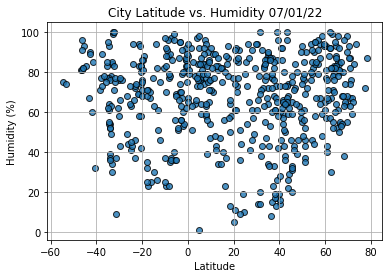

In [11]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

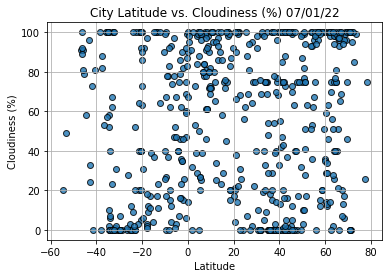

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

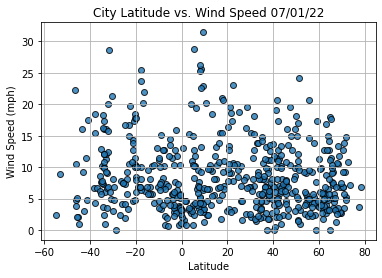

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Define function for finding linear regression and plotting a regression line

In [15]:
# Import linregress
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# Create Northern & Southern hemispher dataframes

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Max Temp

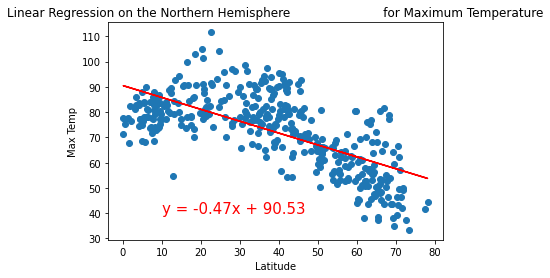

In [39]:
# Linear regression on the Northern Hemispher.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp', (10,40))

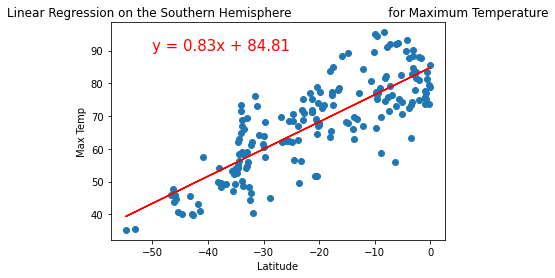

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Humidity

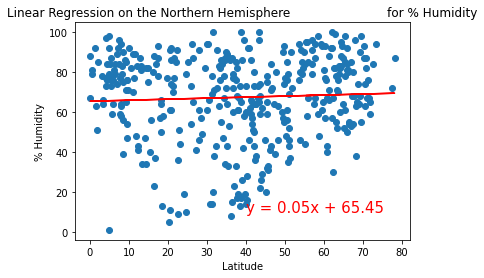

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

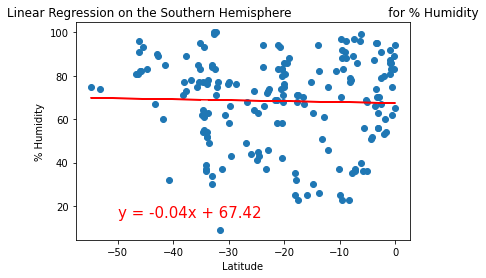

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Percent Cloudiness

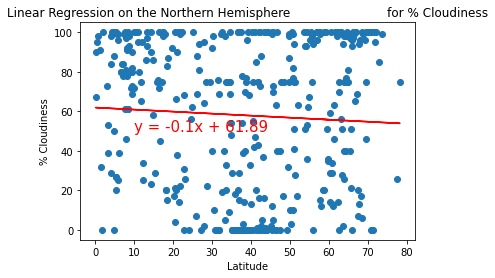

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,50))

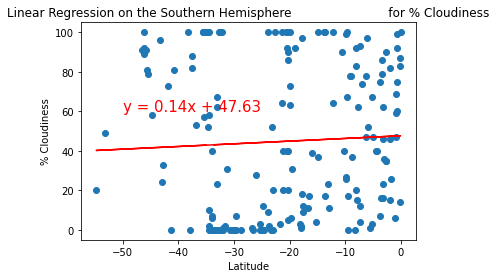

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Wind Speed

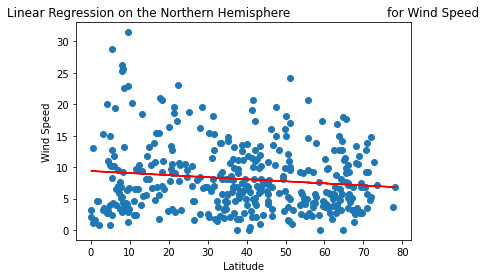

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

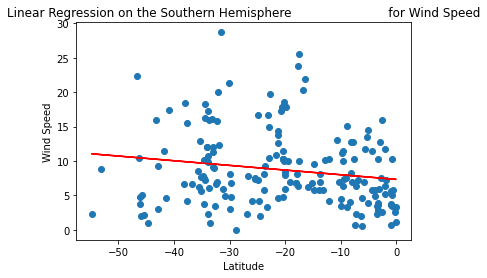

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))